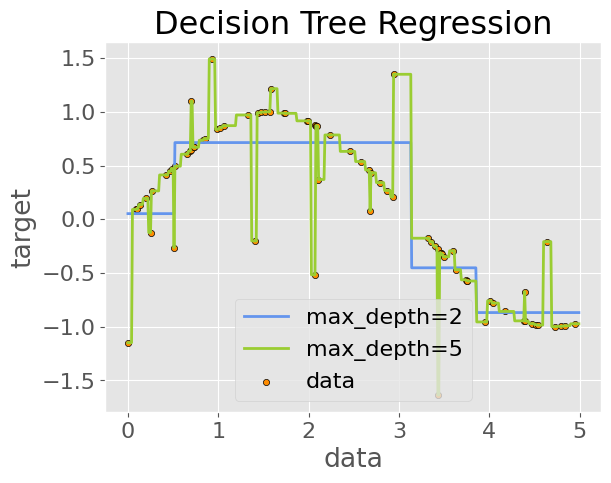

In [161]:
# https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=300)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# try waveform example

In [162]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# from cycler import cycler
# from itertools import cycle

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("ggplot")
mpl.rcParams.update({"font.size": 16})

import pickle

In [163]:
from tqdm import tqdm

In [164]:
pkl_filename = "pre_processing/times_scaler.pkl"
with open(pkl_filename, 'rb') as file:
    times_scaler = pickle.load(file)

In [165]:
times_scaler

MinMaxScaler(feature_range=(-1, 1))

In [166]:
times = np.load("training_data/times.npy")

In [167]:
times_scaled = times_scaler.transform(times[:, np.newaxis])[:, 0]

In [168]:
times

array([-499.50442803, -499.00442803, -498.50442803, ...,   48.49557197,
         48.99557197,   49.49557197])

In [169]:
times_scaled

array([-1.        , -0.99817851, -0.99635701, ...,  0.99635701,
        0.99817851,  1.        ])

In [170]:
times.shape

(1099,)

In [171]:
times_scaled.shape

(1099,)

In [172]:
amps = np.load("training_data/amplitude.npy")
# amps = np.load("validation_data/amplitude.npy")
amp_processing_params = np.load("pre_processing/amp_preprocessing_params.npz")

# amps = np.load("training_data/phase.npy")
# amp_processing_params = np.load("pre_processing/phase_preprocessing_params.npz")

In [173]:
amps.shape

(500, 1099)

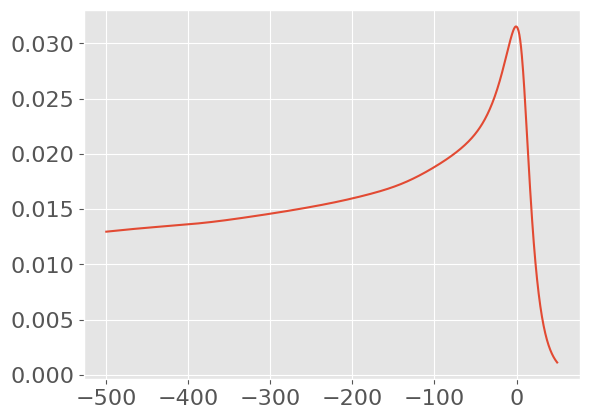

In [174]:
plt.figure()
plt.plot(times, amps[0])

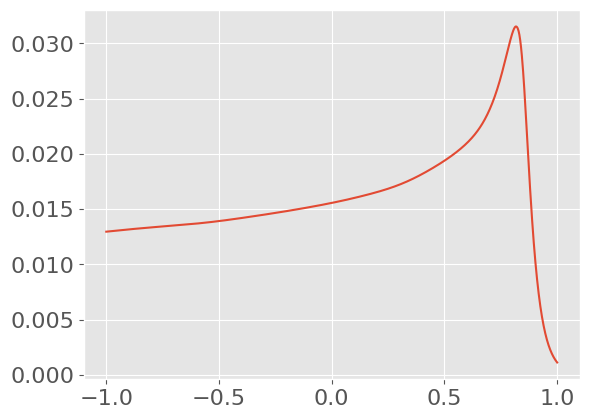

In [175]:
plt.figure()
plt.plot(times_scaled, amps[0])

In [176]:
list(amp_processing_params)

['mean', 'max']

In [177]:
amp_processing_params['mean']

array([[0.01255005, 0.01255297, 0.01255593, ..., 0.00125779, 0.00120668,
        0.00115758]])

In [178]:
amp_processing_params['mean'].shape

(1, 1099)

In [179]:
amp_processing_params['max']

array(0.00714663)

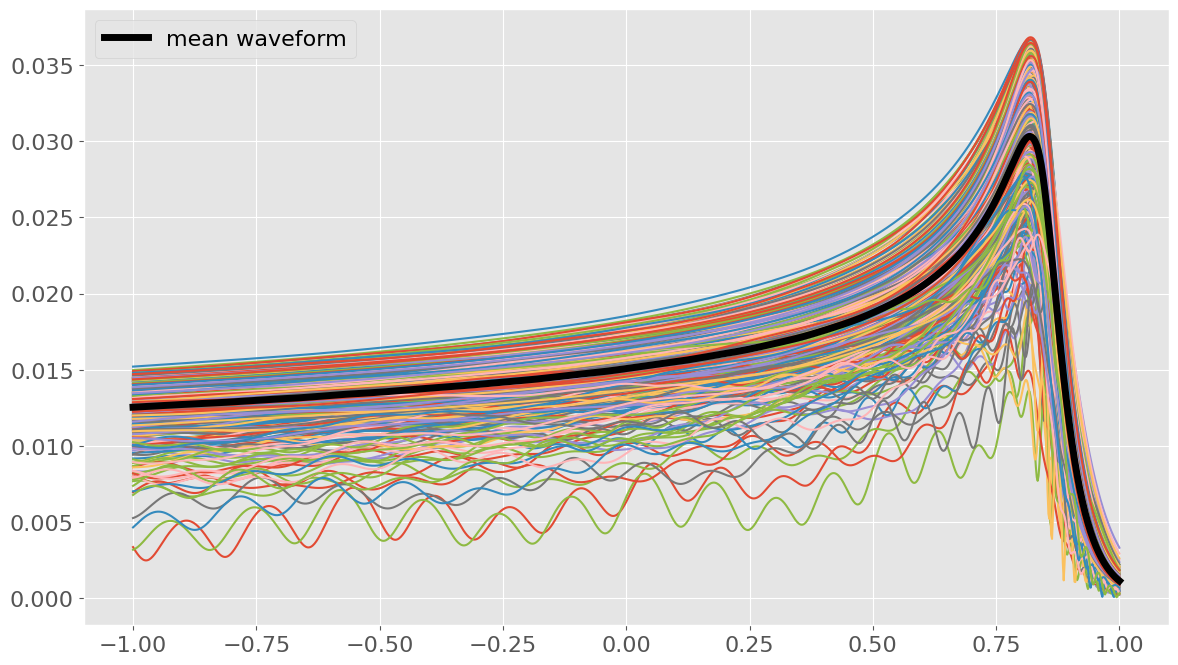

In [180]:
plt.figure(figsize=(14, 8))
for y in amps:
    plt.plot(times_scaled, y)
    
plt.plot(times_scaled, amp_processing_params['mean'][0], label='mean waveform', lw=5, c='k')
plt.legend()

In [181]:
import compute_preprocessing

In [182]:
amps_scaled = compute_preprocessing.apply_pre_process_forward(amps, amp_processing_params['mean'], amp_processing_params['max'])

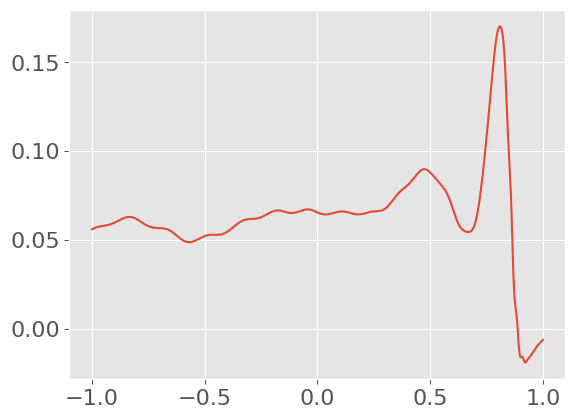

In [183]:
plt.figure()
plt.plot(times_scaled, amps_scaled[0])

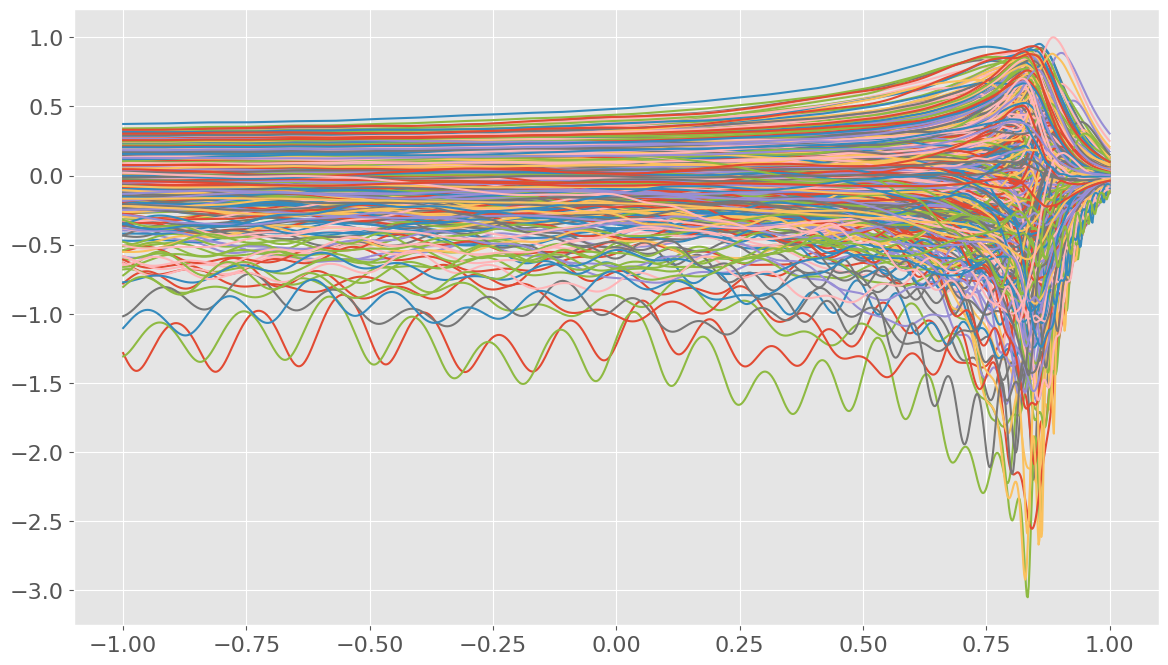

In [184]:
plt.figure(figsize=(14, 8))
for y in amps_scaled:
    plt.plot(times_scaled, y)
#     plt.plot(times, y)
# plt.xlim(-100, 100)

In [185]:
amps_scaled_reverse = compute_preprocessing.apply_pre_process_reverse(amps_scaled, amp_processing_params['mean'], amp_processing_params['max'])

In [186]:
np.testing.assert_array_almost_equal(amps, amps_scaled_reverse)

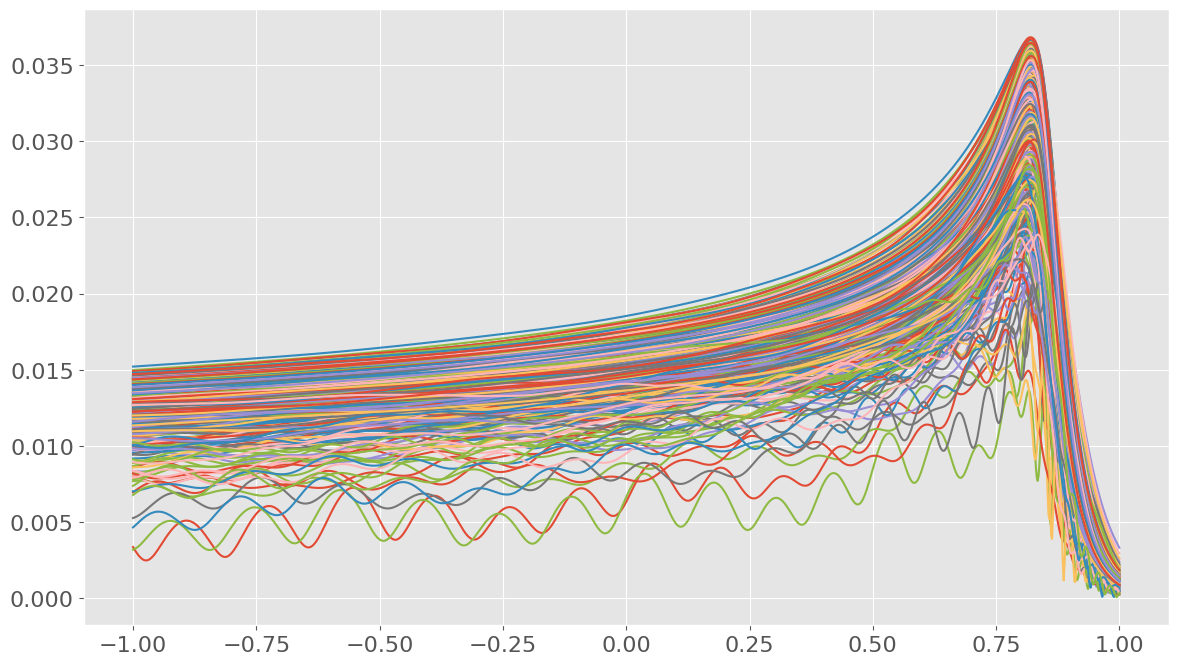

In [187]:
plt.figure(figsize=(14, 8))
for y in amps_scaled_reverse:
    plt.plot(times_scaled, y)

# setting up the domain

In [188]:
coords = np.load("training_data/coords.npy")
# coords = np.load("validation_data/coords.npy")

In [189]:
times.shape

(1099,)

In [190]:
coords.shape

(3, 500)

In [191]:
amps.shape

(500, 1099)

In [192]:
np.outer(coords, times).shape

(1500, 1099)

In [193]:
(times[:, np.newaxis]*coords[0]).shape

(1099, 500)

In [194]:
1099 * 3

3297

In [195]:
def convert_input_for_ann(times, q, chi1, theta1):
    X = []
    for _q, _chi1, _theta1 in zip(q, chi1, theta1):
        for t in times:
            X.append([t, _q, _chi1, _theta1])
    X = np.asarray(X)
    return X

In [196]:
X = convert_input_for_ann(times_scaled, coords[0], coords[1], coords[2])

In [197]:
y = amps.ravel()
print(y.shape)

# X = []


# # for b,c,d in coords.T:

# bb = coords[0]
# cc = coords[1]
# dd = coords[2]

# for b,c,d in zip(bb,cc,dd):
#     for a in times_scaled:
# #         print(a,b,c,d)
#         X.append([a,b,c,d])
# X = np.asarray(X)

(549500,)


In [198]:
# coords[0]

In [199]:
# coords[1]

In [200]:
# coords[2]*180/np.pi

In [201]:
X.shape

(549500, 4)

In [202]:
X[2]

array([-0.99635701,  2.03547937,  0.2632761 ,  1.29650135])

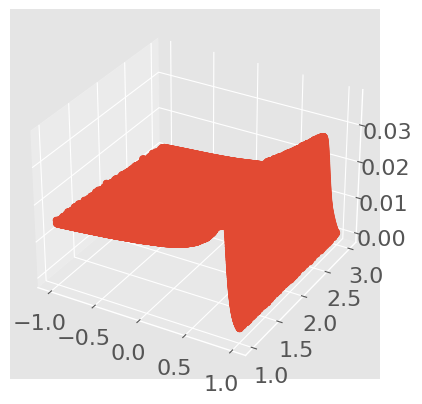

In [203]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,1], y)

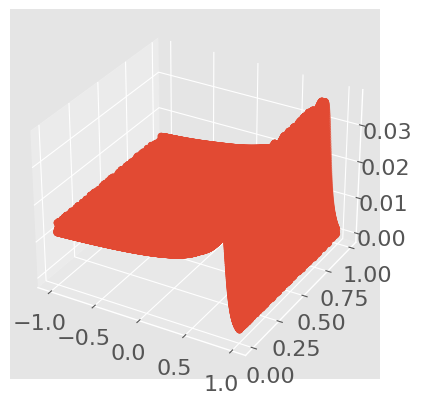

In [204]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,2], y)

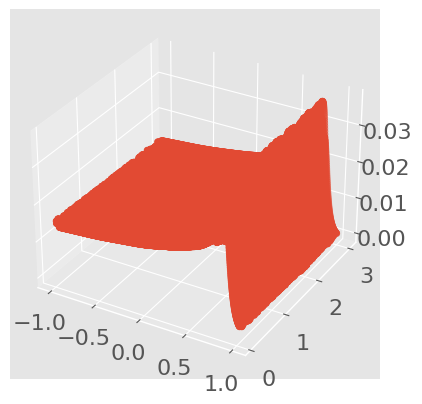

In [205]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0], X[:,3], y)

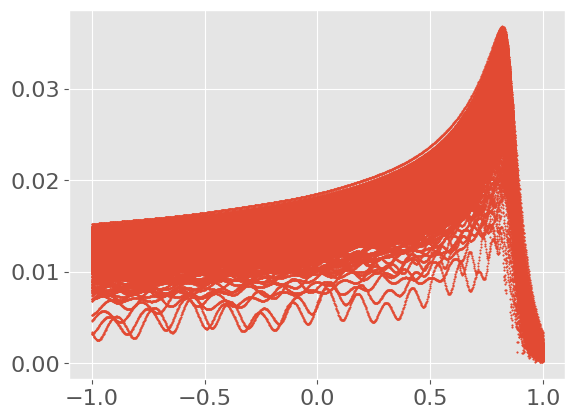

In [206]:
plt.figure()
plt.scatter(X[:,0], y, s=1)

In [207]:
X.shape

(549500, 4)

In [208]:
y.shape

(549500,)

In [209]:
%%time
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=23)
regr_2 = DecisionTreeRegressor(max_depth=50)
regr_1.fit(X, y)
regr_2.fit(X, y)

CPU times: user 3.32 s, sys: 105 ms, total: 3.43 s
Wall time: 3.42 s


DecisionTreeRegressor(max_depth=50)

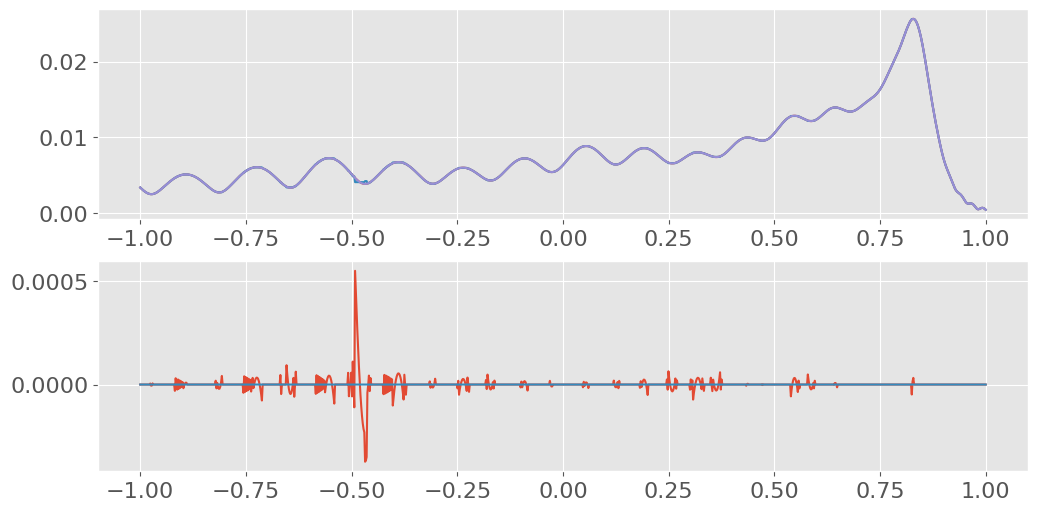

In [210]:
# index = 355
index = 21
X_test = convert_input_for_ann(times_scaled, [coords[0,index]], [coords[1,index]], [coords[2,index]])
X_test.shape

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

y_1.shape
amps[index].shape

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(times_scaled, amps[index])
plt.plot(times_scaled, y_1)
plt.plot(times_scaled, y_2)

# plt.xlim(0.5, 1)

plt.subplot(2, 1, 2)
plt.plot(times_scaled, amps[index]-y_1)
plt.plot(times_scaled, amps[index]-y_2)

In [211]:
def compute_model_input(times, q, chi1, theta1):
    
    # broadcast and stack with times array
    output = np.ones(shape=(times.shape[0], 1))
    output = output * np.array([q, chi1, theta1])
    
    output = np.column_stack((times, output))
    
    return output
    

In [212]:
max_error_indices = np.array([21,  23,  33,  49,  74,  80,  98, 124, 149, 168, 187, 194, 203])

In [213]:
regr_2.predict(output)[np.newaxis, :].shape

(1, 1099)

In [214]:
compute_preprocessing.apply_pre_process_reverse(regr_2.predict(output)[np.newaxis, :], amp_processing_params['mean'], amp_processing_params['max'])

array([[0.01264726, 0.01265021, 0.01265319, ..., 0.00126882, 0.00121724,
        0.00116778]])

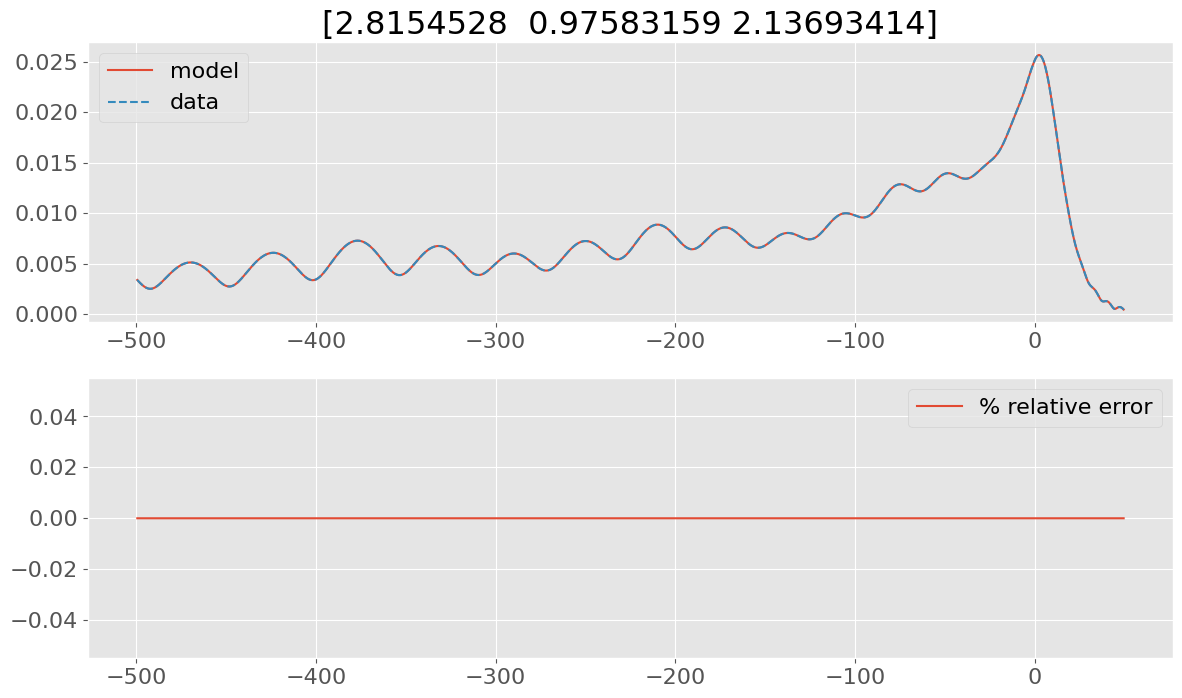

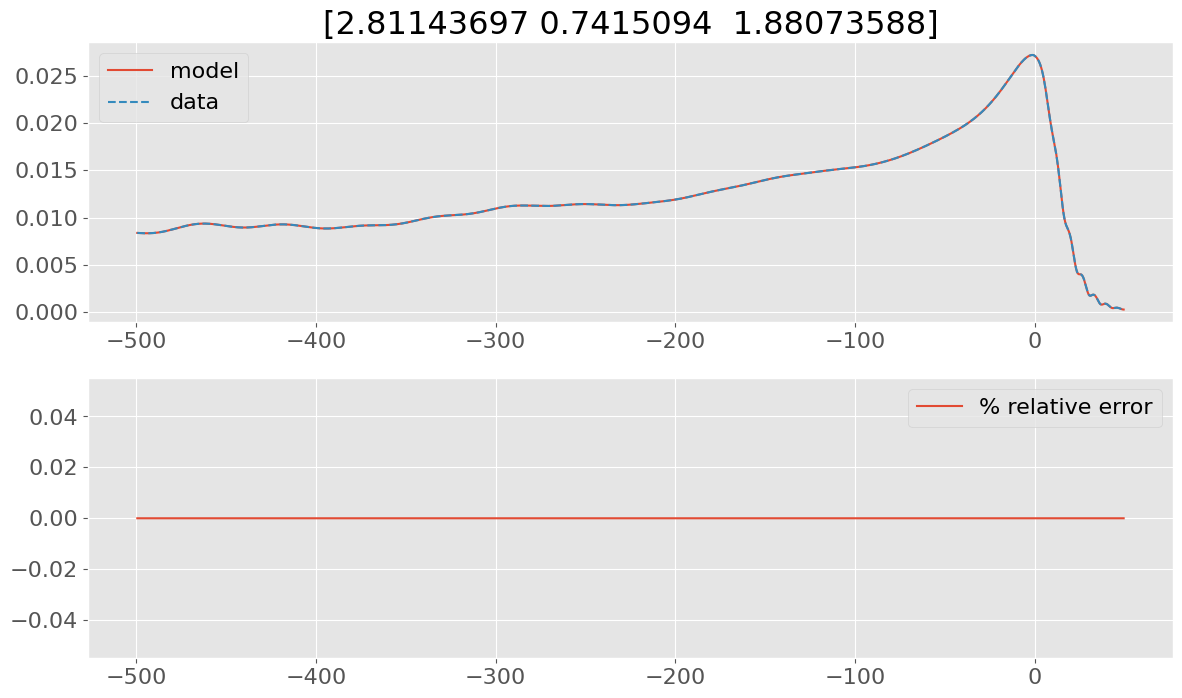

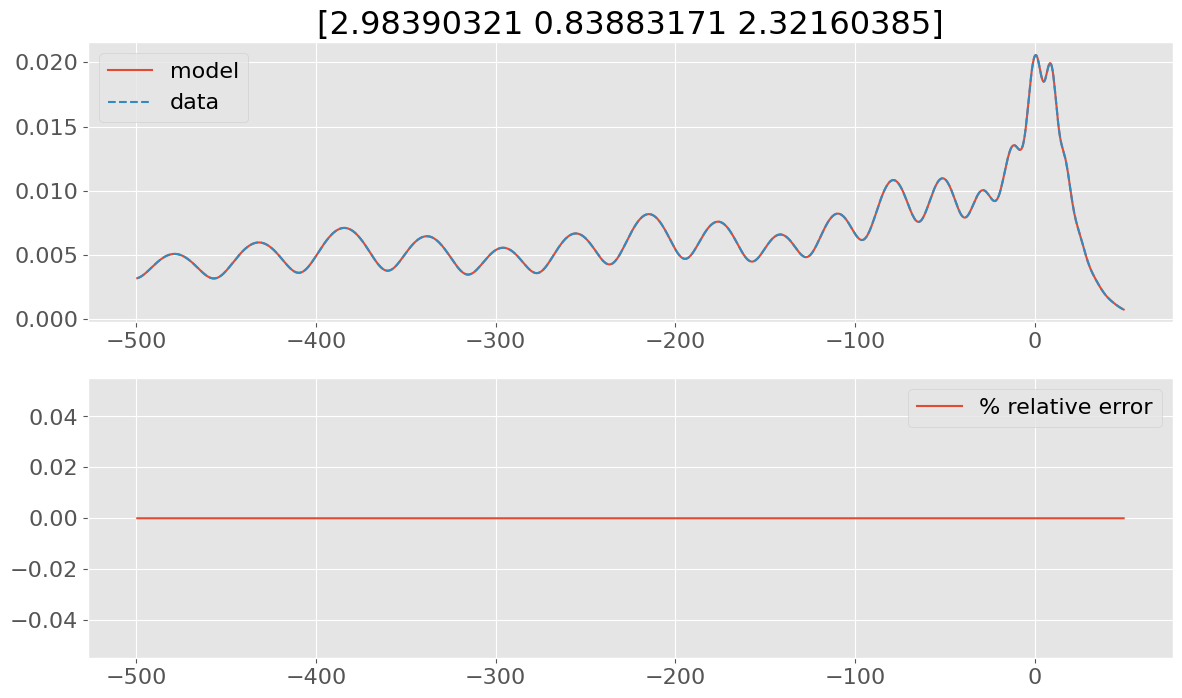

In [215]:

for index in max_error_indices[:3]:

    output = compute_model_input(times_scaled, *coords[:,index])
    output.shape
    yhat = regr_2.predict(output)[np.newaxis, :]
#     yhat = model.predict(output).T
    # yhat = model.predict(X)
    # yhat = model.predict(X[int(1099*1):int(1099*2)])
    yhat.shape
#     yhat = compute_preprocessing.apply_pre_process_reverse(yhat, amp_processing_params['mean'], amp_processing_params['max'])
    yhat.shape
    plt.figure(figsize=(14,8))
    plt.subplot(2, 1, 1)
    plt.plot(times, yhat[0], label='model')
    plt.plot(times, amps[index], label='data', ls='--')
#     plt.plot(times, amps_scaled[index], ls='--')
    plt.title(f"{coords[:,index]}")
#     plt.xlim(-100, 50)
#     plt.ylim(-80, -40)
    plt.legend()

    plt.subplot(2, 1, 2)
#     plt.plot(times, yhat[0]-amps[index])
    plt.plot(times, 100*(yhat[0]-amps[index])/amps[index], label='% relative error')
#     plt.plot(times, (yhat[0]-amps[index]), label='error')
#     plt.plot(times, yhat[0]-amps_scaled[index], label='error')
    # plt.title(f"{coords[:,index]}")
    plt.legend()
    
    plt.show()
    plt.close()